# Deep Learning BTC 

Reference: https://github.com/marcosan93/Price-Forecaster/blob/master/BTC-Models/BTC-RNN-Deep-Learning.ipynb

## install libraries, only first time 

In [1]:
#only run the first time to initialisation
#install required libraries in pip
#!pip3 install numpy
#!pip3 install matplotlib
#!pip3 install pandas
#!pip3 install sklearn
#!pip3 install keras
#!pip3 install tensorflow

## importing libraries 

In [2]:
# Library Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
plt.style.use("ggplot")

from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

Using TensorFlow backend.


## loading the data

In [3]:
# Loading/Reading in the Data
df = pd.read_csv("BTC-USD.csv")

## prepocessing the data

In [4]:
#Data Prepocessing
## Setting the datetime index as the date, only selecting the "Close" column, then only the last 1000 closing prices.
df = df.set_index('Date')[['Close']].tail(1193)
df = df.set_index(pd.to_datetime(df.index))

# Normalizing/Scaling the Data
scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns, index=df.index)


## Visualize prepocessed data

In [5]:
#Checking newly formatted DataFrame
df.head()

,Close
Date,
2017-01-01,0.011783
2017-01-02,0.013034
2017-01-03,0.014214
2017-01-04,0.020138
2017-01-05,0.012587


Text(0.5, 1.0, 'BTC Closing Prices')

Text(0, 0.5, 'Price(Normalized)')

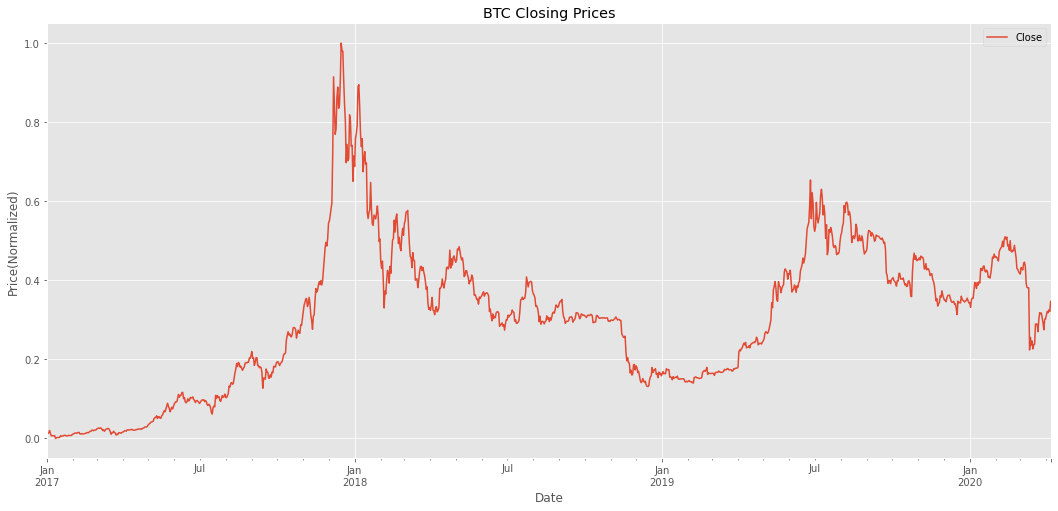

In [6]:
#Plotting the closing prices
df.plot(figsize=(18,8))
plt.title("BTC Closing Prices")
plt.ylabel("Price(Normalized)")
plt.show()

# Function to prepare the data for LSTM

In [7]:
def split_sequence(seq, n_steps_in, n_steps_out):
    """
    Splits the univariate time sequence
    """
    X, y = [], []
    
    for i in range(len(seq)):
        end = i + n_steps_in
        out_end = end + n_steps_out
        
        if out_end > len(seq):
            break
        
        seq_x, seq_y = seq[i:end], seq[end:out_end]
        
        X.append(seq_x)
        y.append(seq_y)
    
    return np.array(X), np.array(y)

In [37]:
def visualize_training_results(results):
    """
    Plots the loss and accuracy for the training and testing data
    """
    history = results.history
    plt.figure(figsize=(12,4))
    plt.plot(history['val_loss'])
    plt.plot(history['loss'])
    plt.legend(['value_loss','loss'])
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.show()
    
    plt.figure(figsize=(12,4))
    plt.plot(history['val_accuracy'])
    plt.plot(history['accuracy'])
    plt.legend(['val_accuracy', 'accuracy'])
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.show()

In [17]:
def layer_maker(n_layers, n_nodes, activation, drop=None, d_rate=.5):
    """
    Creates a specified number of hidden layers for an RNN
    Optional: Adds regularization option - the dropout layer to prevent potential overfitting (if necessary)
    """
    
    #Creating the specified number of hidden layers with the specified number of nodes
    
    for x in range (1,n_layers+1):
        model.add(LSTM(n_nodes, activation=activation, return_sequences=True))
        
        #Adds a Dropout layer after every Nth hidden layer (the 'drop' variable)
        try:
            if x % drop == 0:
                model.add(Dropout(d_rate))
        except:
            pass

## Splitting the Data

In [18]:
# How many periods looking back to learn
n_per_in = 30

# How many periods to predict
n_per_out = 10

# Features (in this case it's 1 because there is only one feature: price)
n_features = 1

# Splitting the data into appropriate sequences
X, y = split_sequence(list(df.Close), n_per_in, n_per_out)

# Reshaping the X variable from 2D to 3D
X = X.reshape((X.shape[0], X.shape[1], n_features))


# Modeling - LSTM (RNN)

## Creating the Neural Network

In [19]:
# Instatiating the model
model = Sequential()

# Activation
activ = "softsign"

# Input layer
model.add(LSTM(30, activation=activ, return_sequences=True, input_shape=(n_per_in, n_features)))

# Hidden layers
layer_maker(n_layers=6, n_nodes=12, activation=activ)

# Final Hidden layer
model.add(LSTM(10, activation=activ))

# Output layer
model.add(Dense(n_per_out))

# Model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 30, 30)            3840      
_________________________________________________________________
lstm_10 (LSTM)               (None, 30, 12)            2064      
_________________________________________________________________
lstm_11 (LSTM)               (None, 30, 12)            1200      
_________________________________________________________________
lstm_12 (LSTM)               (None, 30, 12)            1200      
_________________________________________________________________
lstm_13 (LSTM)               (None, 30, 12)            1200      
_________________________________________________________________
lstm_14 (LSTM)               (None, 30, 12)            1200      
_________________________________________________________________
lstm_15 (LSTM)               (None, 30, 12)           

In [20]:
# Compiling the data with selected specifications
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

## Fitting and Training the RNN

In [29]:
res = model.fit(X, y, epochs=150, batch_size=32, validation_split=0.1)

Train on 1038 samples, validate on 116 samples
Epoch 1/150
1038/1038 [==============================] - 6s 6ms/step - loss: 0.1014 - accuracy: 0.0819 - val_loss: 0.0776 - val_accuracy: 0.0776
Epoch 2/150
1038/1038 [==============================] - 2s 2ms/step - loss: 0.0566 - accuracy: 0.1320 - val_loss: 0.0300 - val_accuracy: 0.0776
Epoch 3/150
1038/1038 [==============================] - 2s 2ms/step - loss: 0.0343 - accuracy: 0.1541 - val_loss: 0.0078 - val_accuracy: 0.0603
Epoch 4/150
1038/1038 [==============================] - 2s 2ms/step - loss: 0.0153 - accuracy: 0.0761 - val_loss: 0.0062 - val_accuracy: 0.1983
Epoch 5/150
1038/1038 [==============================] - 2s 2ms/step - loss: 0.0130 - accuracy: 0.0732 - val_loss: 0.0065 - val_accuracy: 0.1121
Epoch 6/150
1038/1038 [==============================] - 2s 2ms/step - loss: 0.0112 - accuracy: 0.0751 - val_loss: 0.0095 - val_accuracy: 0.0431
Epoch 7/150
1038/1038 [==============================] - 2s 2ms/step - loss: 0.0103

Epoch 57/150
1038/1038 [==============================] - 3s 3ms/step - loss: 0.0023 - accuracy: 0.1561 - val_loss: 0.0043 - val_accuracy: 0.1638
Epoch 58/150
1038/1038 [==============================] - 3s 2ms/step - loss: 0.0024 - accuracy: 0.1484 - val_loss: 0.0052 - val_accuracy: 0.1810
Epoch 59/150
1038/1038 [==============================] - 2s 2ms/step - loss: 0.0024 - accuracy: 0.1715 - val_loss: 0.0049 - val_accuracy: 0.1897
Epoch 60/150
1038/1038 [==============================] - 3s 3ms/step - loss: 0.0023 - accuracy: 0.1609 - val_loss: 0.0049 - val_accuracy: 0.1293
Epoch 61/150
1038/1038 [==============================] - 3s 3ms/step - loss: 0.0023 - accuracy: 0.1570 - val_loss: 0.0048 - val_accuracy: 0.1897
Epoch 62/150
1038/1038 [==============================] - 3s 2ms/step - loss: 0.0023 - accuracy: 0.1628 - val_loss: 0.0049 - val_accuracy: 0.1638
Epoch 63/150
1038/1038 [==============================] - 2s 2ms/step - loss: 0.0023 - accuracy: 0.1763 - val_loss: 0.0051 -

1038/1038 [==============================] - 3s 2ms/step - loss: 0.0017 - accuracy: 0.1763 - val_loss: 0.0043 - val_accuracy: 0.1810
Epoch 114/150
1038/1038 [==============================] - 2s 2ms/step - loss: 0.0017 - accuracy: 0.1956 - val_loss: 0.0062 - val_accuracy: 0.2069
Epoch 115/150
1038/1038 [==============================] - 3s 3ms/step - loss: 0.0019 - accuracy: 0.1927 - val_loss: 0.0051 - val_accuracy: 0.2155
Epoch 116/150
1038/1038 [==============================] - 2s 2ms/step - loss: 0.0017 - accuracy: 0.1917 - val_loss: 0.0046 - val_accuracy: 0.1983
Epoch 117/150
1038/1038 [==============================] - 2s 2ms/step - loss: 0.0017 - accuracy: 0.1782 - val_loss: 0.0041 - val_accuracy: 0.1638
Epoch 118/150
1038/1038 [==============================] - 2s 2ms/step - loss: 0.0017 - accuracy: 0.2187 - val_loss: 0.0043 - val_accuracy: 0.1121
Epoch 119/150
1038/1038 [==============================] - 2s 2ms/step - loss: 0.0017 - accuracy: 0.1821 - val_loss: 0.0041 - val_ac

## Plotting the Accuracy and Loss

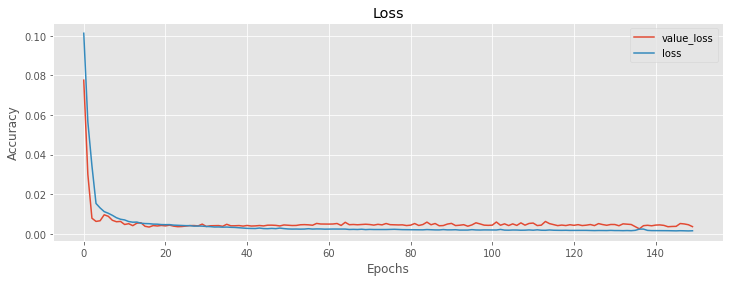

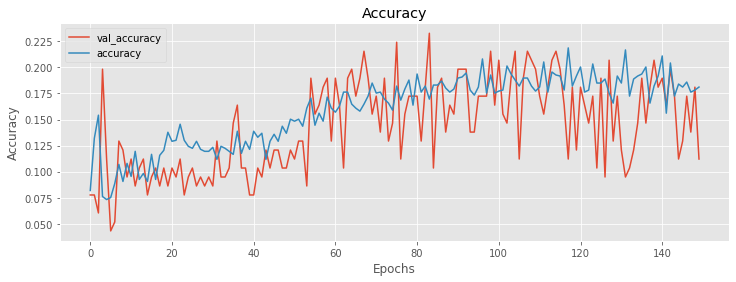

In [38]:
visualize_training_results(res)

# Visualizing the Predictions

## Validating the Model

Plotting the difference between the Actual closing prices and the Predicted prices

<Figure size 864x360 with 0 Axes>

Predicted Prices:
 [[8671.02114653771], [8869.191633237799], [8947.562184763405], [9069.502739442885], [9122.014585032548], [9141.96078497058], [9346.029272558562], [9456.038816361339], [9782.10308962463], [9798.118962637272]]



Actual Prices:
 [[5922.042969], [6429.841797], [6438.644531], [6606.7763669999995], [6793.624512], [6733.387206999998], [6867.527343999998], [6791.129395], [7271.78125], [7156.023437999999]]


Text(0.5, 1.0, 'Predicted vs Actual Closing Prices')

Text(0, 0.5, 'Price')

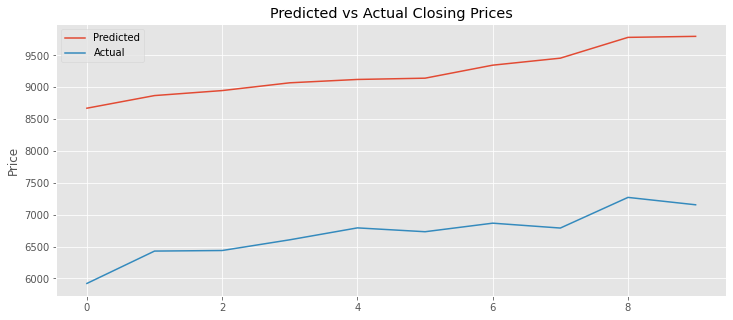

In [31]:
plt.figure(figsize=(12,5))

# Getting predictions by predicting from the last available X variable
yhat = model.predict(X[-1].reshape(1, n_per_in, n_features)).tolist()[0]

# Transforming values back to their normal prices
yhat = scaler.inverse_transform(np.array(yhat).reshape(-1,1)).tolist()

# Getting the actual values from the last available y variable which correspond to its respective X variable
actual = scaler.inverse_transform(y[-1].reshape(-1,1))

# Printing and plotting those predictions
print("Predicted Prices:\n", yhat)
plt.plot(yhat, label='Predicted')

# Printing and plotting the actual values
print("\nActual Prices:\n", actual.tolist())
plt.plot(actual.tolist(), label='Actual')

plt.title(f"Predicted vs Actual Closing Prices")
plt.ylabel("Price")
plt.legend()
plt.savefig("BTC_validation.png")
plt.show()

## Predicting/Forecasting the future prices

                  Close
2020-04-07  7301.113926
2020-04-08  7309.767339
2020-04-09  7445.980365
2020-04-10  7604.533491
2020-04-11  7583.135106
2020-04-12  7660.976221
2020-04-13  7687.922252
2020-04-14  7714.198817
2020-04-15  7844.726955
2020-04-16  7650.597815


<Figure size 1152x432 with 0 Axes>

Text(0, 0.5, 'Price')

Text(0.5, 0, 'Dates')

Text(0.5, 1.0, 'Forecasting the next 10 days')

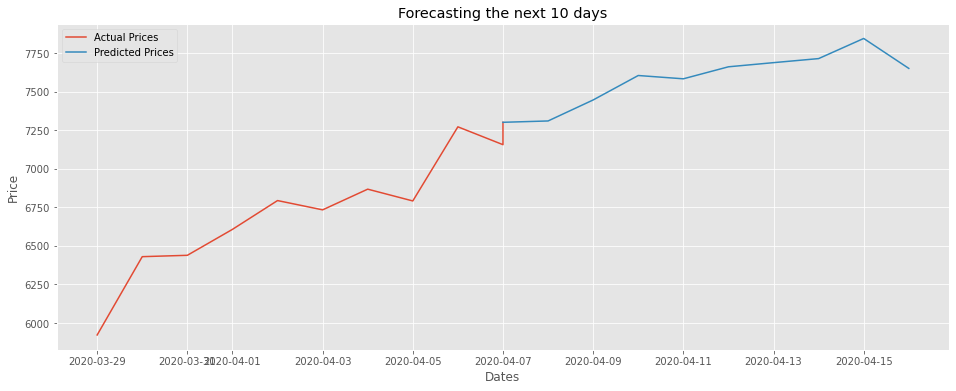

In [32]:
# Predicting off of y because it contains the most recent dates
yhat = model.predict(np.array(df.tail(n_per_in)).reshape(1, n_per_in, n_features)).tolist()[0]

# Transforming the predicted values back to their original prices
yhat = scaler.inverse_transform(np.array(yhat).reshape(-1,1)).tolist()

# Creating a DF of the predicted prices
preds = pd.DataFrame(yhat, index=pd.date_range(start=df.index[-1], periods=len(yhat), freq="D"), columns=df.columns)

# Printing the predicted prices
print(preds)

# Number of periods back to visualize the actual values
pers = 10

# Transforming the actual values to their original price
actual = pd.DataFrame(scaler.inverse_transform(df[["Close"]].tail(pers)), index=df.Close.tail(pers).index, columns=df.columns).append(preds.head(1))

# Plotting
plt.figure(figsize=(16,6))
plt.plot(actual, label="Actual Prices")
plt.plot(preds, label="Predicted Prices")
plt.ylabel("Price")
plt.xlabel("Dates")
plt.title(f"Forecasting the next {len(yhat)} days")
plt.legend()
plt.savefig("BTC_predictions.png")
plt.show()